In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [3]:
#Define the positive and negative classes
positive_points = np.array([(-2,3) ,(0,1 ), (2,-1)])
negative_points  = np.array([(-2,1), (0,-1) , (2,-3)])

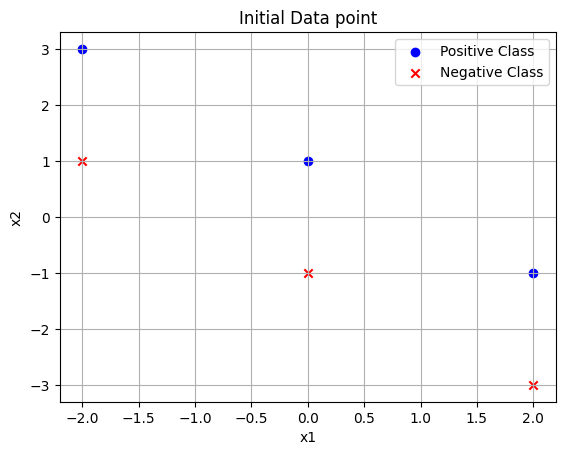

In [4]:
#plot initial data points
plt.Figure(figsize= (8,6))
plt.scatter(positive_points[:,0] , positive_points[:,1] , color = 'blue' , marker='o' , label='Positive Class')
plt.scatter(negative_points[:,0] , negative_points[:,1] , color = 'red' , marker='x' , label='Negative Class')
plt.legend(loc= 'best')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Initial Data point')
plt.grid(True)
plt.show()


In [5]:
x = np.vstack((positive_points , negative_points))
y = np.array([1] * len(positive_points) + [-1]* len(negative_points))

In [6]:
y

array([ 1,  1,  1, -1, -1, -1])

In [7]:
#Perceptron algorithm
def perceptron(x , y , steps = 0):
    theta = np.zeros(x.shape[1])
    theta0 = 0
    error = []

    for t in range(steps):
        for i , xi in enumerate(x):
            if y[i] * (np.dot(xi , theta) + theta0) <= 0 :
                theta += y[i] * xi
                theta0 == y[i]

                margin_error = margin_error_func(y[i] , xi , theta , theta0)
                print(margin_error)
                error.append(margin_error)
                break
        #plot after each iteration
        plot_decision_boundary(theta , theta0 , t+ 1)
    best_error = np.argmax(error)
    return theta , theta0 , margin_error

def margin_error_func(y , x , theta , theta0):
    
    error = y * (np.dot(theta , x) + theta0)/ np.linalg.norm(theta)

   
    return error


In [8]:
def plot_decision_boundary(theta, theta0 , iteration):
    plt.figure(figsize=(8 , 6))
    plt.scatter(positive_points[:,0] , positive_points[:,1] , color = 'blue' , marker='o' , label='Positive Class')
    plt.scatter(negative_points[:,0] , negative_points[:,1] , color = 'red' , marker='x' , label='Negative Class')

    #plt decision boundary
    x_values = np.linspace(-3 , 3 ,3 )
    #check for theta[1] to avoid division by zero in case of vertical line
    if theta[1] != 0 :
        y_values = -(theta[0] * x_values + theta0) / theta[1]
        plt.plot(x_values , y_values , label = f'iteration {iteration}')
    else:
        #plot vertical line
        x_val = -theta0 / theta[0]
        plt.axvline( x= x_val , label = f'iteration {iteration}')

    plt.xlim(-3 , 3)
    plt.ylim(-4 , 4)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Decision boundary at the iteration {iteration}')
    plt.legend()
    plt.grid(True)
    plt.show()

3.6055512754639896


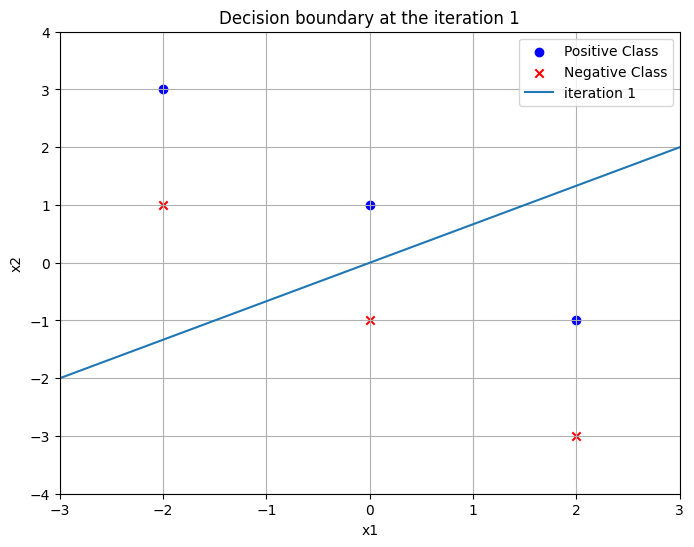

-1.0


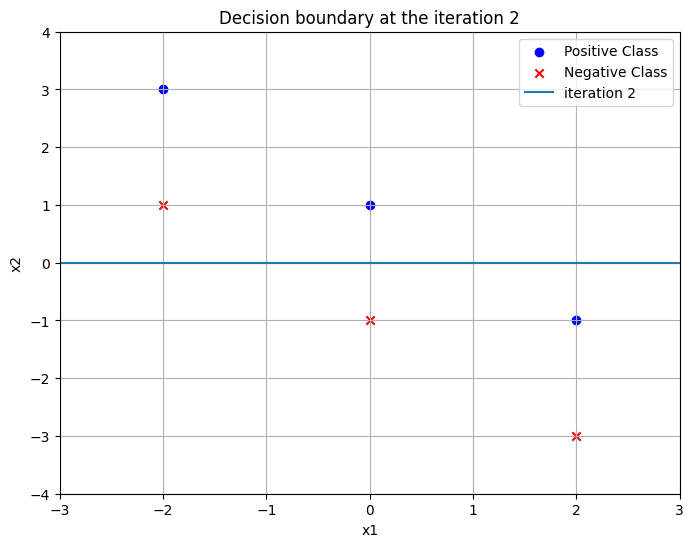

1.3416407864998738


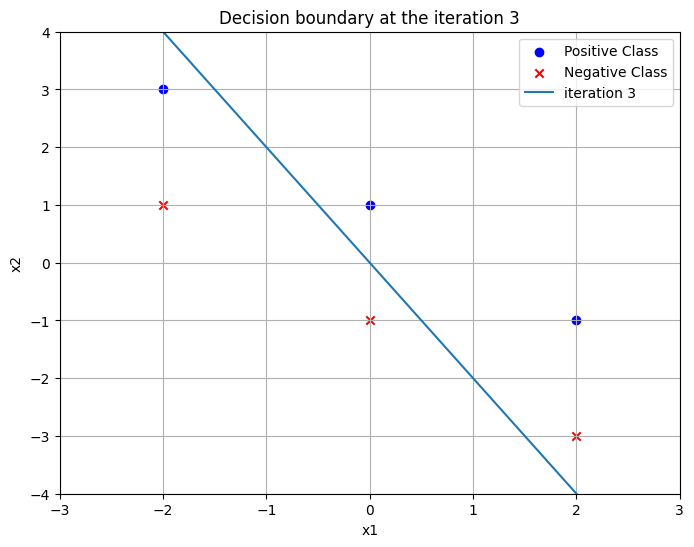

3.0


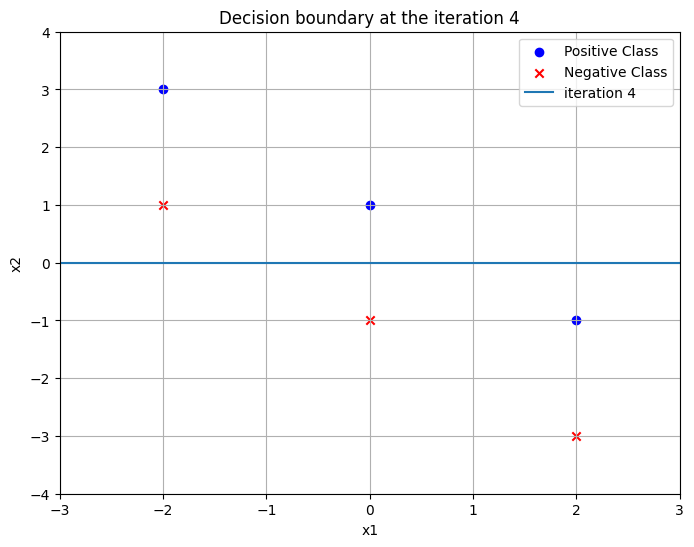

0.2773500981126146


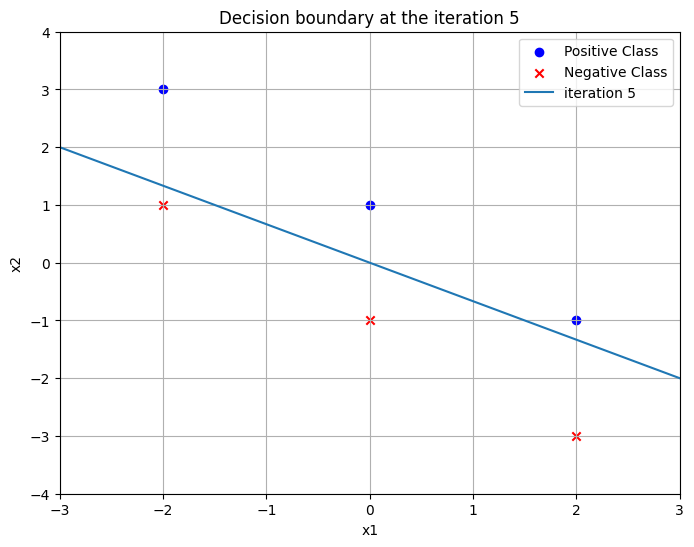

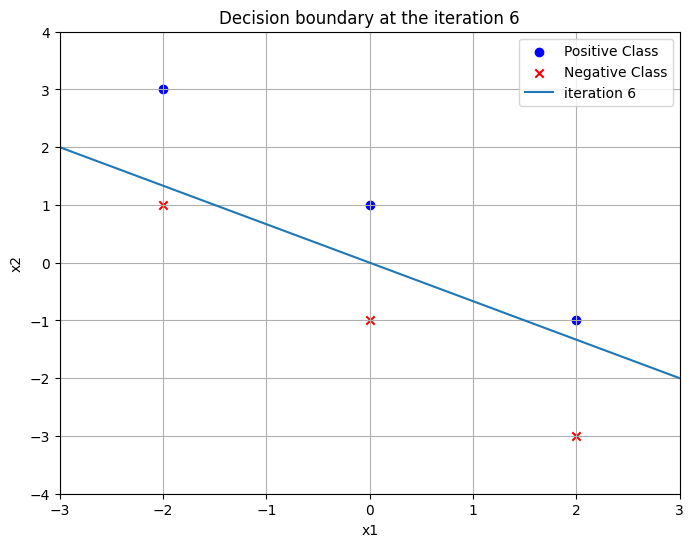

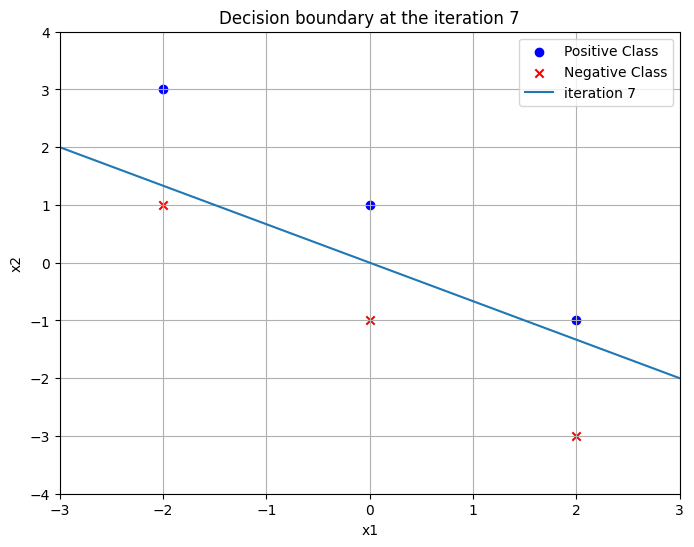

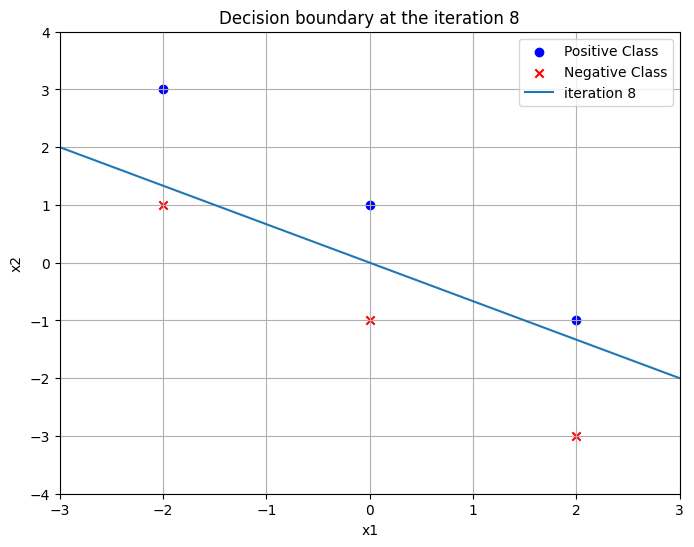

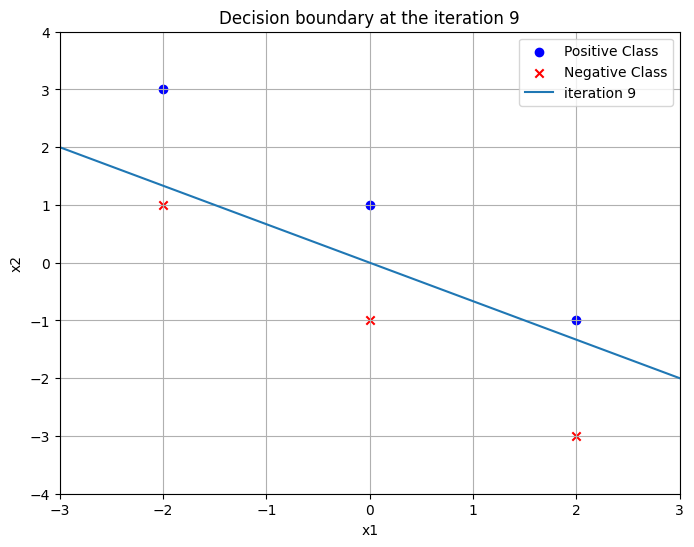

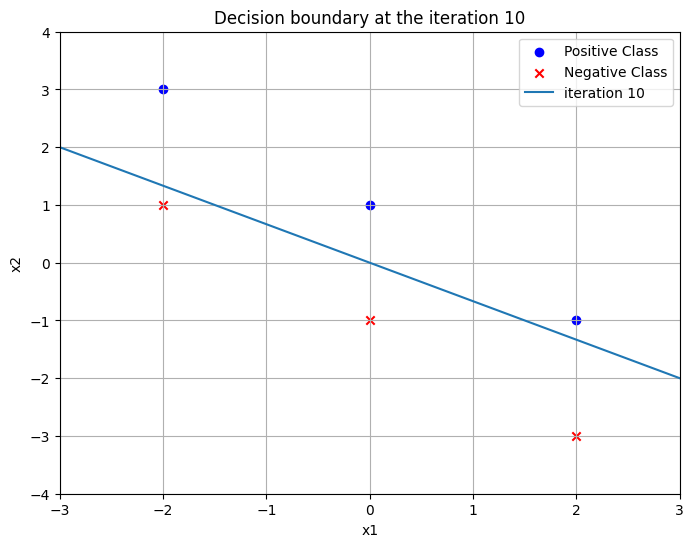

In [9]:
theta_final , theta0_final , best_margin_error = perceptron(x , y , 10)

In [10]:
best_margin_error.round(3) 

np.float64(0.277)

In [11]:
margin = int(3 / best_margin_error) ** 2

In [12]:
margin

100